In [68]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
%autoreload 

In [70]:
%load_ext autoreload 
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from santa_2022.original import *
from santa_2022.plotting import *

<AxesSubplot: >

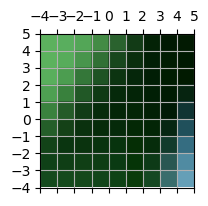

In [11]:
origin = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
image = df_to_image(pd.read_csv("../data/image.csv"))
mini_arm = [(2, 0), (-1, 0), (-1, 0)]
mini_image = sliced_image(mini_arm, image)
plot_image(mini_image)

<AxesSubplot: title={'center': 'Neighbors of [(2, 0), (-1, 0), (-1, 0)]'}>

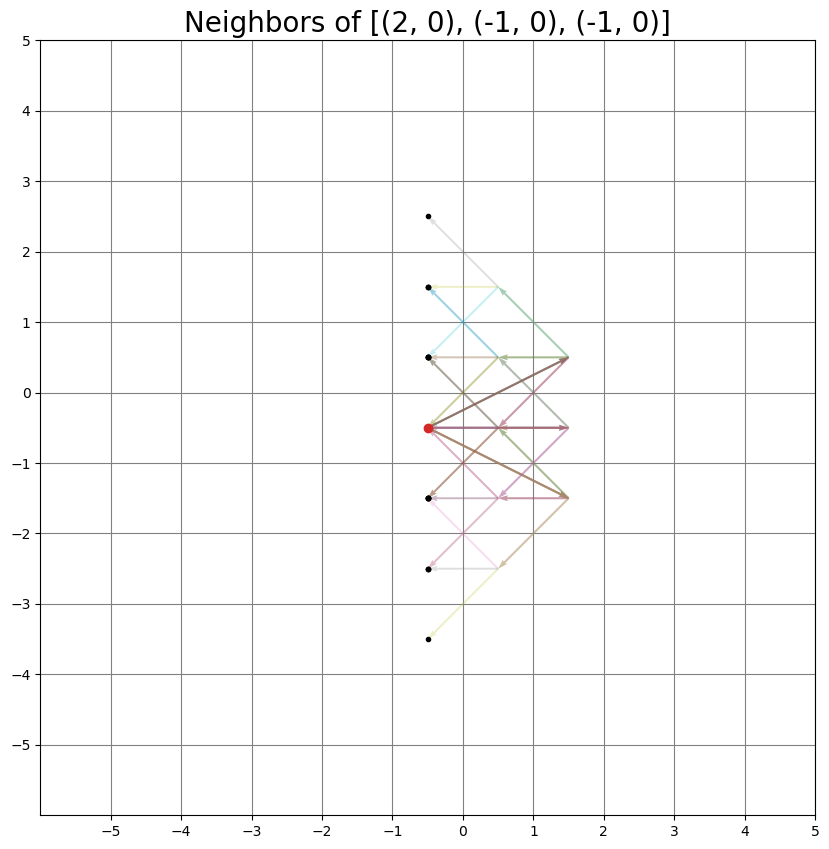

In [6]:
plot_neighbors(mini_arm)

In [7]:
get_reachable_positions(get_neighbors(mini_arm))

{(0, -3), (0, -2), (0, -1), (0, 0), (0, 1), (0, 2), (0, 3)}

In [24]:
sorted(get_neighbors_positions_costs(mini_arm, mini_image), key=lambda x: x[-1])[:5]

[([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, -1)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, -1), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 1), (-1, 0)], (0, 1), 1.105882352941176),
 ([(2, 0), (-1, 0), (-1, 1)], (0, 1), 1.105882352941176)]

In [25]:
def cheapest_five(config):
    return sorted(get_neighbors_positions_costs(config, mini_image), key=lambda x: x[-1])[:5]

In [26]:
cheapest_five(mini_arm)

[([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, -1)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, -1), (-1, 0)], (0, -1), 1.0941176470588236),
 ([(2, 0), (-1, 1), (-1, 0)], (0, 1), 1.105882352941176),
 ([(2, 0), (-1, 0), (-1, 1)], (0, 1), 1.105882352941176)]

In [42]:
for item in cheapest_five(mini_arm)[:3]:
    display(item, cheapest_five(item[0]))

([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236)

[([(2, -1), (-1, 1), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, -1), (-1, 0), (-1, 1)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, -2), (-1, 0), (-1, 0)], (0, -2), 1.1764705882352942),
 ([(2, -1), (-1, 0), (-1, -1)], (0, -2), 1.1764705882352942)]

([(2, 0), (-1, 0), (-1, -1)], (0, -1), 1.0941176470588236)

[([(2, 0), (-1, 1), (-1, -1)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, 0), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, 0), (0, -1)], (1, -1), 1.0941176470588236),
 ([(2, 1), (-1, 0), (-1, -1)], (0, 0), 1.0941176470588236),
 ([(2, -1), (-1, 0), (-1, -1)], (0, -2), 1.1764705882352942)]

([(2, 0), (-1, -1), (-1, 0)], (0, -1), 1.0941176470588236)

[([(2, 0), (-1, 0), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, 0), (-1, -1), (-1, 1)], (0, 0), 1.0941176470588236),
 ([(2, 0), (0, -1), (-1, 0)], (1, -1), 1.0941176470588236),
 ([(2, 1), (-1, -1), (-1, 0)], (0, 0), 1.0941176470588236),
 ([(2, -1), (-1, -1), (-1, 0)], (0, -2), 1.1764705882352942)]

In [31]:
step_cost([(2, 0), (-1, -1), (-1, 0)], [(2, 0), (0, -1), (-1, 0)], mini_image)

1.0941176470588236

In [76]:
n = mini_arm[0][0] * 2
points = list(product(range(-n, n + 1), repeat=2))
unvisited = set(points)
unvisited.remove((0, 0))
for item in get_all_cheapest_unvisited_neighbors(mini_arm, unvisited, mini_image)[0]:
    display(item, 
            get_position(item),
           get_all_cheapest_unvisited_neighbors(item, unvisited, image))

[(2, -1), (-1, 0), (-1, 0)]

(0, -1)

([[(2, -2), (-1, 0), (-1, 0)],
  [(2, -1), (-1, 0), (-1, -1)],
  [(2, -1), (-1, -1), (-1, 0)]],
 1.1764705882352942)

[(2, 0), (-1, 0), (-1, -1)]

(0, -1)

([[(2, 0), (-1, 0), (0, -1)]], 1.0941176470588236)

[(2, 0), (-1, -1), (-1, 0)]

(0, -1)

([[(2, 0), (0, -1), (-1, 0)]], 1.0941176470588236)

In [60]:
[(2, -1), (-1, 0), (-1, 0)] in get_unvisited_neighbors([(2, -1), (-1, 0), (-1, 0)], unvisited)

False

In [10]:
min(get_neighbors_positions_costs(mini_arm, mini_image), key=lambda x: x[-1])

([(2, -1), (-1, 0), (-1, 0)], (0, -1), 1.0941176470588236)

In [15]:
pd.DataFrame(sorted(get_neighbors_positions_costs(origin, image), key=lambda x: x[-1])[:10])

,0,1,2
0,"[(64, -1), (-32, 0), (-16, 0), (-8, 0), (-4, 0...","(0, -1)",1.094118
1,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0)...","(0, -1)",1.094118
2,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0)...","(0, -1)",1.094118
3,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0)...","(0, -1)",1.094118
4,"[(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, -1...","(0, -1)",1.094118
5,"[(64, 0), (-32, 0), (-16, 0), (-8, -1), (-4, 0...","(0, -1)",1.094118
6,"[(64, 0), (-32, 0), (-16, -1), (-8, 0), (-4, 0...","(0, -1)",1.094118
7,"[(64, 0), (-32, -1), (-16, 0), (-8, 0), (-4, 0...","(0, -1)",1.094118
8,"[(64, 0), (-32, 1), (-16, 0), (-8, 0), (-4, 0)...","(0, 1)",1.105882
9,"[(64, 0), (-32, 0), (-16, 1), (-8, 0), (-4, 0)...","(0, 1)",1.105882


In [28]:
def plot_points(config, points):
    point = points[0]
    k = 2 ** (len(config) - 1) + 1
    colors = plt.cm.plasma(np.linspace(0, 1, len(points)))

    fig, ax = plt.subplots(figsize=(5, 6))
    for i, p in enumerate(points):
        prev_point = point
        point = p
        ax.plot(point[0]-0.5, point[1]-0.5, '.', color="k", zorder=11)
        ax.arrow(prev_point[0]-0.49, prev_point[1]-0.49, point[0]-prev_point[0], point[1]-prev_point[1],
                 width=0.0025, zorder=10, alpha=0.8, head_width=0.1, length_includes_head=True, color=colors[i])
    ax.set_xlim(-k-1, k)
    ax.set_ylim(-k-1, k)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-k, k+1))
    ax.set_yticks(np.arange(-k, k+1))
    ax.grid(True, color='0.5')
    ax.set_title(f"Plot of path", fontsize=20)
    return ax

<AxesSubplot: title={'center': 'Plot of path'}>

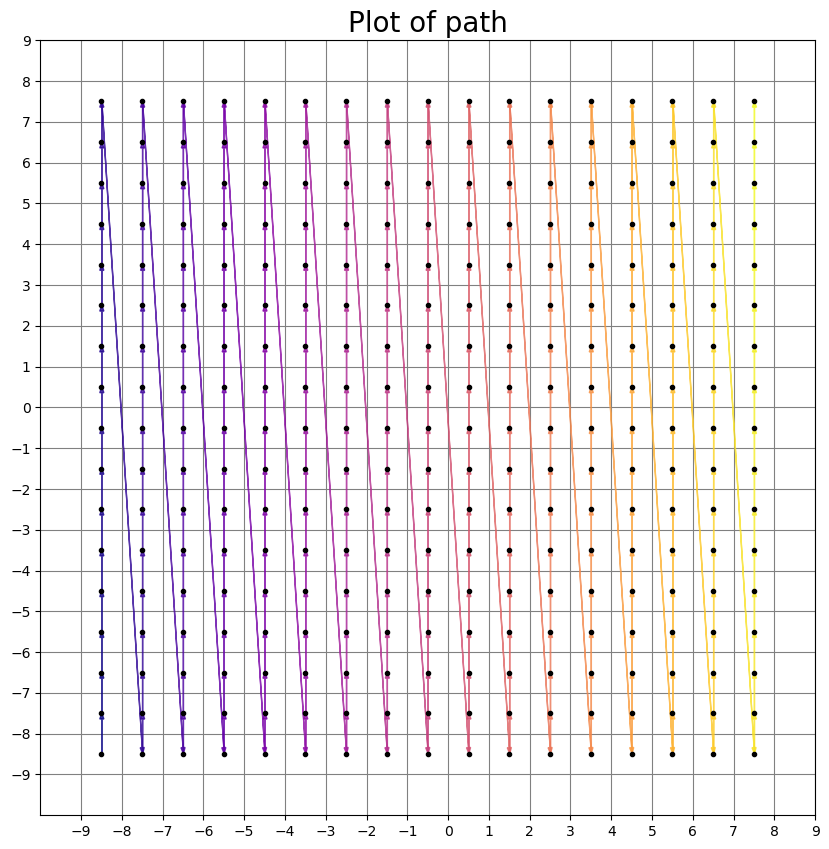

In [14]:
# initial order

origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = origin[0][0] * 2
points = list(product(range(-n, n + 1), repeat=2))

plot_points(origin, points)

<AxesSubplot: title={'center': 'Plot of path'}>

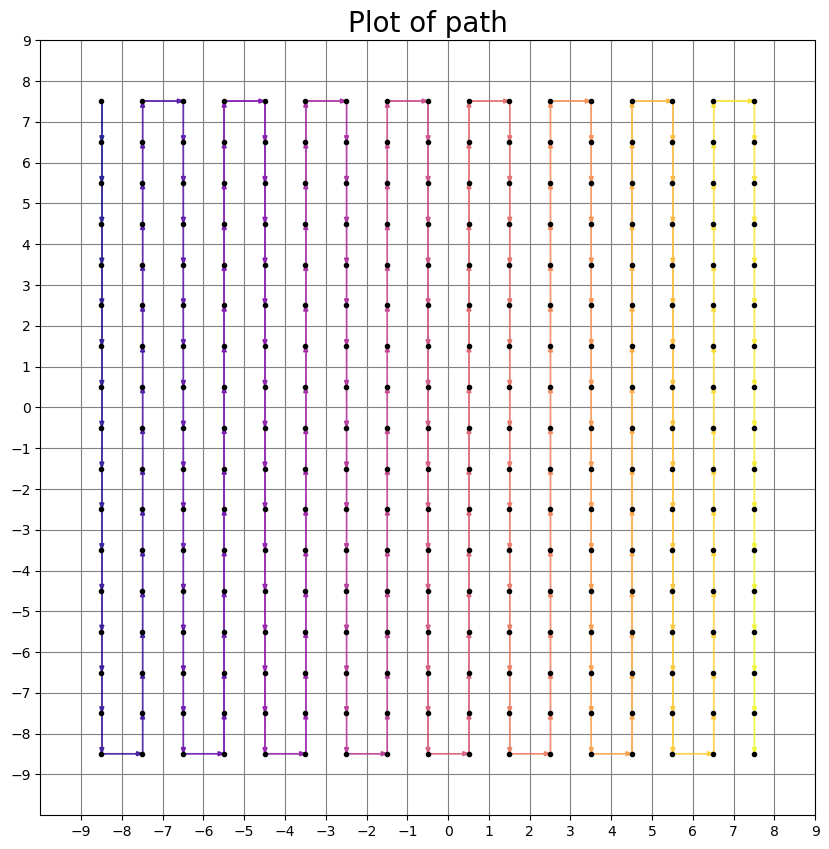

In [15]:
origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = origin[0][0] * 2

points = []
for x in list(product(range(-n, n + 1), repeat=1)):
    if x[0] % 2 == 0:
        for y in list(product(range(n, -n-1, -1), repeat=1)):
            points.append((x[0],y[0]))
    else:
        for y in list(product(range(-n, n + 1), repeat=1)):
            points.append((x[0],y[0]))

plot_points(origin, points)

<AxesSubplot: title={'center': 'Plot of path'}>

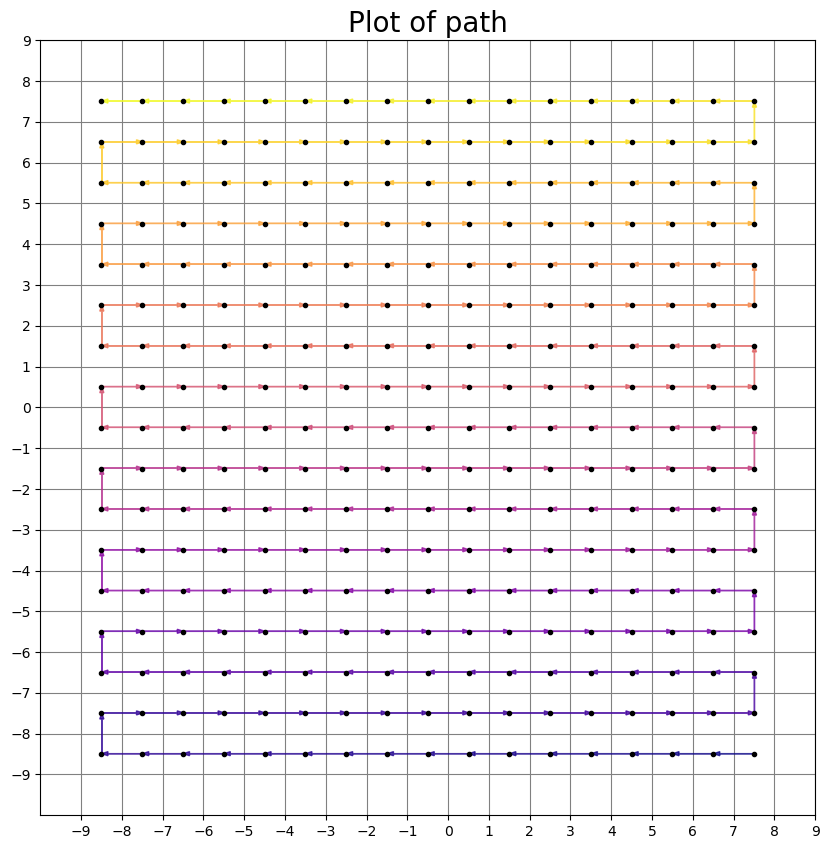

In [16]:
origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = origin[0][0] * 2

points = []
for x in list(product(range(-n, n + 1), repeat=1)):
    if x[0] % 2 == 0:
        for y in list(product(range(n, -n-1, -1), repeat=1)):
            points.append((y[0],x[0]))
    else:
        for y in list(product(range(-n, n + 1), repeat=1)):
            points.append((y[0],x[0]))

plot_points(origin, points)

In [20]:
def plot_neighbors(config):
    point = (0, 0)
    cs = get_neighbors(config)
    k = 2 ** (len(config) - 1) + 1
    colors = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

    fig, ax = plt.subplots(figsize=(5, 6))
    for c in cs:
        X, Y = (np.vstack([[(0, 0)], np.asarray(c).cumsum(axis=0)])[:-1].T - 0.5)
        U, V = np.asarray(c).T
        ax.quiver(
            X, Y, U, V,
            angles='xy', scale_units='xy', scale=1,
            color=next(colors),
            width=0.0025,
            zorder=10,
            alpha=0.25,
        )
        point = get_position(c)
        ax.plot(point[0] - 0.5, point[1] - 0.5, '.', color='k', zorder=11)
    point = get_position(config)
    ax.plot(point[0] - 0.5, point[1] - 0.5, 'o', color='C3', zorder=11)
    ax.set_xlim(-k - 1, k)
    ax.set_ylim(-k - 1, k)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(-k, k + 1))
    ax.set_yticks(np.arange(-k, k + 1))
    ax.grid(True, color='0.5')
    ax.set_title(f"Neighbors of {config}", fontsize=20)
    return ax

<AxesSubplot: title={'center': 'Neighbors of [(4, 0), (-2, 0), (-1, 0), (-1, 0)]'}>

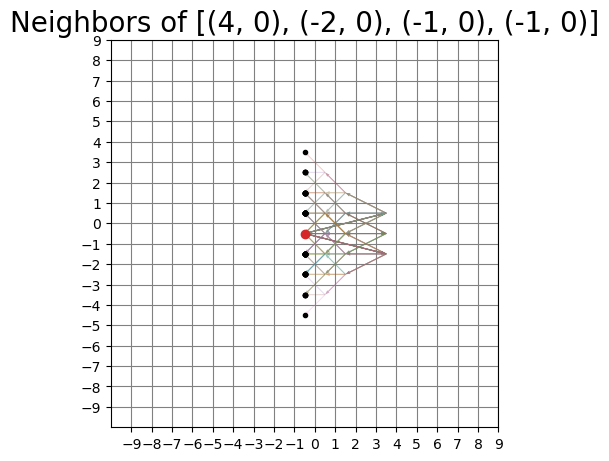

In [21]:
origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
plot_neighbors(origin)

<AxesSubplot: title={'center': 'Neighbors of [(4, 1), (-2, 1), (-1, 1), (-1, 1)]'}>

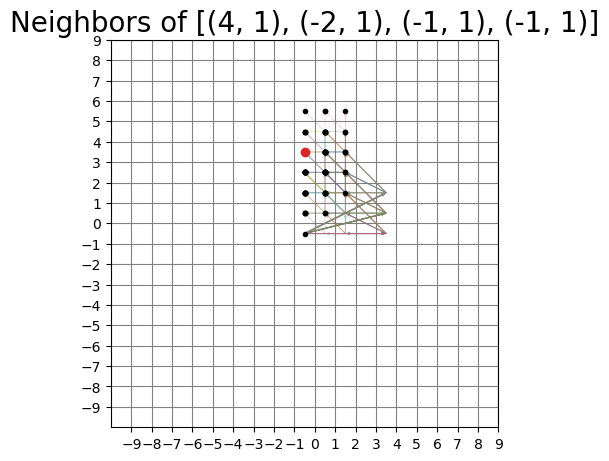

In [22]:
origin = [(4, 1), (-2, 1), (-1, 1), (-1, 1)]
plot_neighbors(origin)

<AxesSubplot: title={'center': 'Neighbors of [(4, 2), (-2, 2), (-1, 1), (-1, 1)]'}>

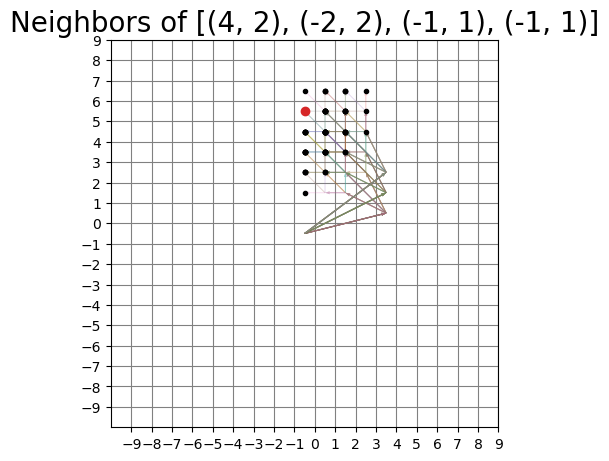

In [24]:
origin = [(4, 2), (-2, 2), (-1, 1), (-1, 1)]
plot_neighbors(origin)

<AxesSubplot: title={'center': 'Neighbors of [(4, 3), (-2, 2), (-1, 1), (-1, 1)]'}>

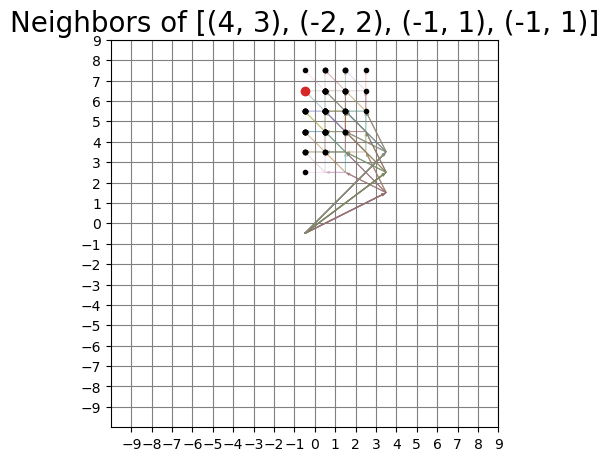

In [25]:
origin = [(4, 3), (-2, 2), (-1, 1), (-1, 1)]
plot_neighbors(origin)

<AxesSubplot: title={'center': 'Neighbors of [(4, 4), (-2, 2), (-1, 1), (-1, 1)]'}>

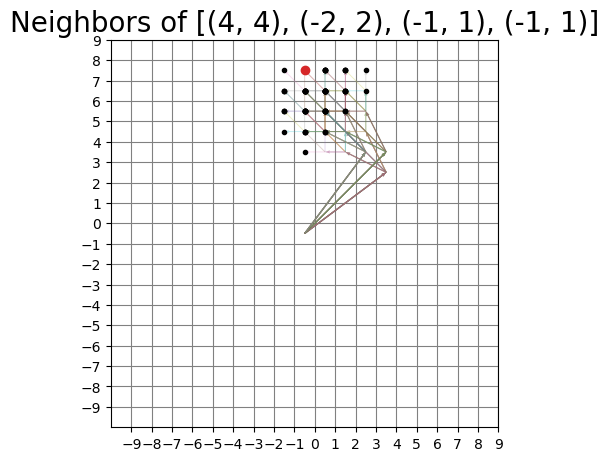

In [26]:
origin = [(4, 4), (-2, 2), (-1, 1), (-1, 1)]
plot_neighbors(origin)

In [1]:
# compress a path between two points
def compress_path(path):
    r = [[] for _ in range(8)]
    for p in path:
        for i in range(8):
            if len(r[i]) == 0 or r[i][-1] != p[i]:
                r[i].append(p[i])
    mx = max([len(x) for x in r])
    
    for rr in r:
        while len(rr) < mx:
            rr.append(rr[-1])
    r = list(zip(*r))
    for i in range(len(r)):
        r[i] = list(r[i])
    return r

In [24]:
def get_path_to_point(config, point):
    """Find a path of configurations to `point` starting at `config`."""
    print("here")
    path = [config]
    # Rotate each link, starting with the largest, until the point can
    # be reached by the remaining links. The last link must reach the
    # point itself.
    for i in range(len(config)):
        link = config[i]
        base = get_position(config[:i])
        relbase = (point[0] - base[0], point[1] - base[1])
        position = get_position(config[:i+1])
        relpos = (point[0] - position[0], point[1] - position[1])
        radius = reduce(lambda r, link: r + max(abs(link[0]), abs(link[1])), config[i+1:], 0)
        # Special case when next-to-last link lands on point. 
        if radius == 1 and relpos == (0, 0):
            config = rotate(config, i, 1)
            if get_position(config) == point:
                path.append(config)
                break
            else:
                continue
        while np.max(np.abs(relpos)) > radius:
            direction = get_direction(link, relbase)
            config = rotate(config, i, direction)
            if i==0:
                print(config)
            path.append(config)
            link = config[i]
            base = get_position(config[:i])
            relbase = (point[0] - base[0], point[1] - base[1])
            position = get_position(config[:i+1])
            relpos = (point[0] - position[0], point[1] - position[1])
            radius = reduce(lambda r, link: r + max(abs(link[0]), abs(link[1])), config[i+1:], 0)
    assert get_position(path[-1]) == point
    return path

In [23]:
origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
point = (0, 1)
path = get_path_to_point(origin, point)
path

here
[(4, 0), (-2, 0), (-1, 0), (-1, 0)]
(-4, 1)
[4 1]
4


[[(4, 0), (-2, 0), (-1, 0), (-1, 0)], [(4, 0), (-2, 0), (-1, 0), (-1, 1)]]

In [5]:
c = [[4, 1], [-2, 1], [-1, 1], [-1, 1]]
get_position(c)

(0, 4)

<AxesSubplot: title={'center': 'Neighbors of [(4, 0), (-2, 0), (-1, 0), (-1, 0)]'}>

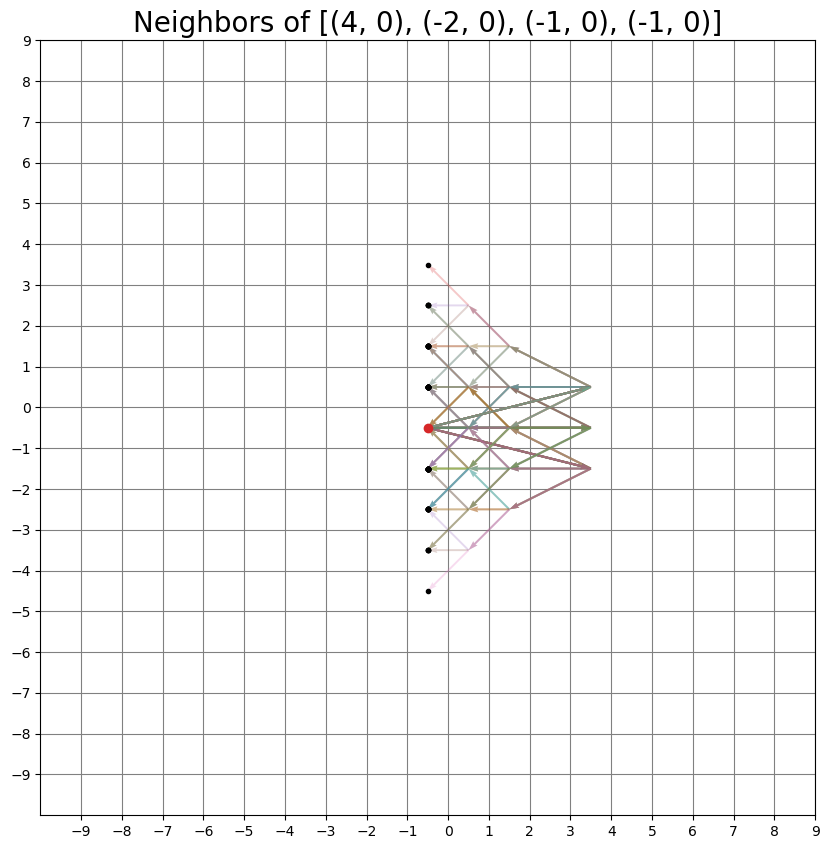

In [4]:
plot_neighbors(origin)

In [63]:
def get_points(n):
    points = []
    # go down for n steps to reach edge (0, -n)
    for i in range(n+1):
        p = (0, -i)
        points.append(p)
        
    for y in range(-n, 1):
        for x in range(1, n+1):
            if y % 2 == 0:
                p = (-x, y)
            else:
                p = (-(n+1)+x, y)
            points.append(p)
            
    for y in range(-n, 1):
        for x in range(1, n+1):
            if y % 2 == 0:
                p = (y, x)
            else:
                p = (y, (n+1)-x)
            points.append(p)
            
    for y in range(n+1):
        for x in range(1, n+1):
            if y % 2 == 0:
                p = (x, n-y)
            else:
                p = ((n+1)-x, n-y)
            points.append(p)
            
    for y in range(n):
        for x in range(1, n+1):
            if y % 2 == 0:
                p = (n-y, -x)
            else:
                p = (n-y, -(n+1)+x)
            points.append(p)
    
    assert len(points) == (2*n+1)**2
    
    return points

<AxesSubplot: title={'center': 'Plot of path'}>

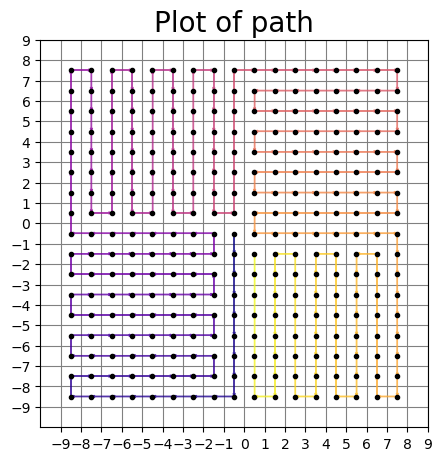

In [64]:
origin = [(4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = origin[0][0] * 2

points = get_points(n)

plot_points(origin, points)

In [67]:
origin = [(64, 0), (-32, 0), (-16, 0), (-8, 0), (-4, 0), (-2, 0), (-1, 0), (-1, 0)]
n = origin[0][0] * 2

points = get_points(n)

len(points)

66049